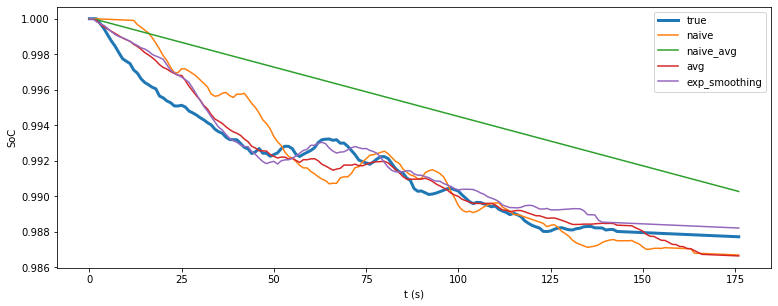

In [110]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Error():
    def __init__(self, true):
        self.true = true;
    
    def rmse(self, pred):
        return np.sqrt(np.mean(np.square(self.true - pred)))
    
    def rmspe(self, pred):
        try:
            rmspe = np.sqrt(np.mean(np.square((self.true - pred) / self.true))) * 100
        except ZeroDivisionError:
            print("denominator zero.")
        return rmspe

    def mae(self, pred):
        return np.mean(abs(self.true - pred))
    
    def mape(self, pred):
        try:
            mape = np.mean(abs((self.true - pred) / self.true)) * 100
        except ZeroDivisionError:
            print("denominator zero.")
        return mape

    def accpe(self, pred):
        try:
    #         accpe = abs((np.array(true)[-1] - np.array(pred)[-1]) / np.array(true)[-1]) * 100
            accpe = abs((self.true - pred) / self.true) * 100
        except ZeroDivisionError:
            print("denominator zero.")
        return accpe

simdf_true = pd.read_csv("data/soc/obd/daniel/true.csv")

simdf_pred = [
    pd.read_csv("data/soc/obd/daniel/naive.csv"),
    pd.read_csv("data/soc/obd/daniel/naive_avg.csv"),
    pd.read_csv("data/soc/obd/daniel/avg.csv"),
    pd.read_csv("data/soc/obd/daniel/exp_smoothing.csv")
]

simdf_pred_name = ['naive', 'naive_avg', 'avg', 'exp_smoothing']

def preprocess_df(df):
    df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df = df['Soc']
#     df = df.map(lambda x: x * 100)
    return df

performance_rmse = {}
performance_rmse_sklearn = {}
performance_mae = {}
performance_mae_sklearn = {}
performance_accpe = {}

simdf_true = preprocess_df(simdf_true)

e = Error(simdf_true)

performance_rmse['true'] = e.rmse(simdf_true)
performance_rmse_sklearn['true'] = mean_squared_error(simdf_true, simdf_true, squared=False)
performance_mae['true'] = e.mae(simdf_true)
performance_mae_sklearn['true'] = mean_absolute_error(simdf_true, simdf_true)
performance_accpe['true'] = e.accpe(simdf_true)

ax0 = simdf_true.plot(linewidth=3.0)

for i, name in enumerate(simdf_pred_name):
    df = preprocess_df(simdf_pred[i])[:simdf_true.size]

    performance_rmse[name]= e.rmse(df)
    performance_rmse_sklearn[name] = mean_squared_error(simdf_true, df, squared=False)
    performance_mae[name] = e.mae(df)
    performance_mae_sklearn[name] = mean_absolute_error(simdf_true, df)
    performance_accpe[name] = e.accpe(df)

    df.plot(ax=ax0)

plt.legend(['true'] + simdf_pred_name);
plt.xlabel('t (s)')
plt.ylabel('SoC')
plt.show()

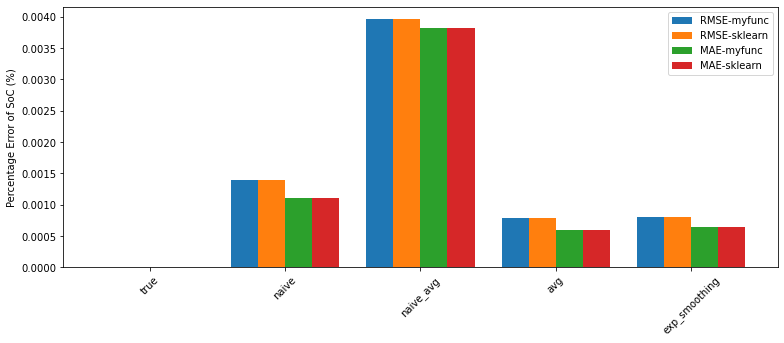

In [115]:
import matplotlib.pyplot as plt

x = np.arange(len(performance_rmspe))
width = 0.2

rmse = [v for v in performance_rmse.values()]
rmse_sklearn = [v for v in performance_rmse_sklearn.values()]
mae = [v for v in performance_mae.values()]
mae_sklearn = [v for v in performance_mae_sklearn.values()]
# accpe = [v for v in performance_accpe.values()]

plt.ylabel('Percentage Error of SoC (%)')
# plt.bar(x - 0.3, rmspe, width, label='RMSPE')
# plt.bar(x, mape, width, label='MAPE')
# plt.bar(x + 0.3, accpe, width, label='AccPE')
plt.bar(x - 0.3, rmse, width, label='RMSE-myfunc')
plt.bar(x - 0.1, rmse_sklearn, width, label='RMSE-sklearn')
plt.bar(x + 0.1, mae, width, label='MAE-myfunc')
plt.bar(x + 0.3, mae_sklearn, width, label='MAE-sklearn')
plt.xticks(ticks=x, labels=performance_rmse.keys(), rotation=45)
_ = plt.legend()